Store - the store number
Date - the week of sales
Weekly_Sales - sales for the given store
Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
Temperature - Temperature on the day of sale
Fuel_Price - Cost of fuel in the region
CPI – Prevailing consumer price index
Unemployment - Prevailing unemployment rate
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13 Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13 Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13 Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100) 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

## Read the data

In [2]:
df=pd.read_csv("Walmart.csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Week'] = df['Date'].dt.week
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year
df.drop('Date',axis=1,inplace=True)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,18,5,2010


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Week          6435 non-null   int64  
 8   Month         6435 non-null   int64  
 9   Year          6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


In [10]:
df.shape

(6435, 10)

In [11]:
df.nunique().sort_values()

Holiday_Flag       2
Year               3
Month             12
Store             45
Week              52
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [12]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,1.038488e-15,6.289676e-16,3.474318e-12
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,6.610484e-02,6.753523e-02,-1.837754e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,3.288032e-01,3.322341e-01,-5.678257e-02
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,7.318701e-02,6.643970e-02,6.426923e-02
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,-4.193804e-02,-5.283174e-02,7.794703e-01
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,2.782979e-03,1.478843e-03,7.479573e-02
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-6.038021e-03,-2.061552e-03,-2.418135e-01
Week,1.038488e-15,0.066105,3.288032e-01,0.073187,-0.041938,0.002783,-0.006038,1.000000e+00,9.964777e-01,-1.269874e-01
Month,6.289676e-16,0.067535,3.322341e-01,0.066440,-0.052832,0.001479,-0.002062,9.964777e-01,1.000000e+00,-1.390145e-01
Year,3.474318e-12,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,-1.269874e-01,-1.390145e-01,1.000000e+00


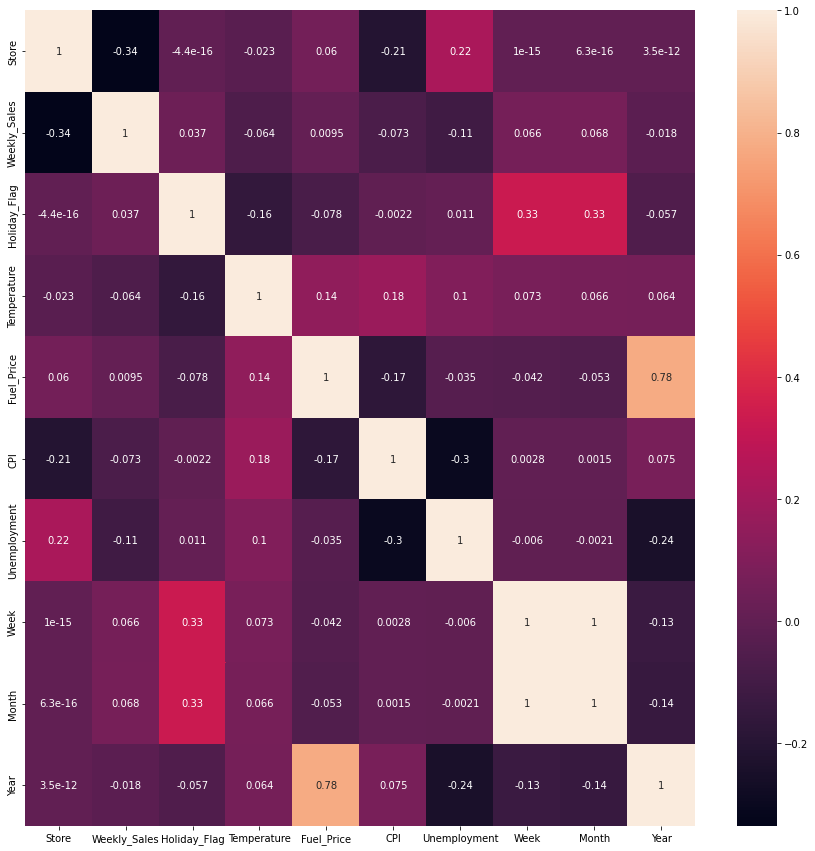

In [13]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot=True);

In [14]:
#Temperature, unemployment, CPI have no significant effect on weekly sales

## Data Visualization

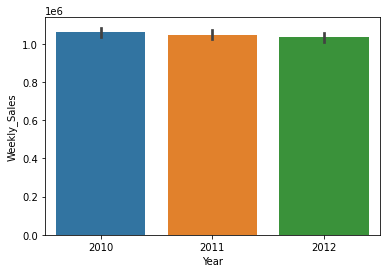

In [15]:
sns.barplot(x=df["Year"],y='Weekly_Sales', data=df);

In [16]:
df.groupby('Year')['Weekly_Sales'].mean().sort_values(ascending=False)

Year
2010    1.059670e+06
2011    1.046239e+06
2012    1.033660e+06
Name: Weekly_Sales, dtype: float64

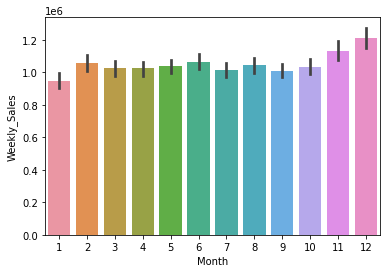

In [17]:
sns.barplot(x=df["Month"], y='Weekly_Sales', data=df);

In [18]:
df.groupby('Month')['Weekly_Sales'].mean().sort_values(ascending=False)

Month
12    1.210255e+06
11    1.133751e+06
6     1.064848e+06
2     1.054597e+06
8     1.044874e+06
5     1.035379e+06
10    1.030631e+06
3     1.024975e+06
4     1.024324e+06
7     1.014212e+06
9     1.009457e+06
1     9.476139e+05
Name: Weekly_Sales, dtype: float64

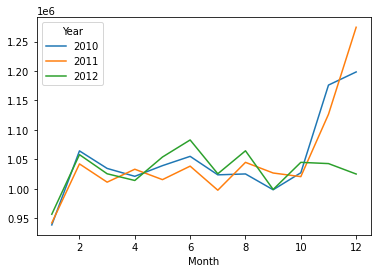

In [19]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales.plot()

In [20]:
df.groupby('Week')['Weekly_Sales'].mean().sort_values(ascending=False)

Week
51    1.754774e+06
47    1.471273e+06
50    1.244704e+06
23    1.133040e+06
7     1.090298e+06
5     1.082980e+06
14    1.081253e+06
10    1.071031e+06
27    1.063499e+06
24    1.062828e+06
40    1.061582e+06
45    1.060001e+06
41    1.058858e+06
18    1.054299e+06
9     1.053973e+06
6     1.052969e+06
36    1.052913e+06
35    1.050277e+06
48    1.047356e+06
33    1.046909e+06
32    1.046063e+06
21    1.044025e+06
34    1.042770e+06
31    1.041630e+06
25    1.038233e+06
37    1.037010e+06
44    1.035482e+06
28    1.034387e+06
15    1.030232e+06
49    1.026382e+06
16    1.025805e+06
13    1.025234e+06
19    1.022916e+06
22    1.020193e+06
46    1.017384e+06
11    1.013058e+06
29    1.009058e+06
1     1.008661e+06
20    1.007338e+06
17    1.003904e+06
43    1.000021e+06
26    9.930322e+05
42    9.926521e+05
8     9.915995e+05
30    9.808207e+05
12    9.778071e+05
52    9.608331e+05
39    9.547859e+05
38    9.513419e+05
3     9.192849e+05
2     9.188529e+05
4     8.826092e+05
Name: W

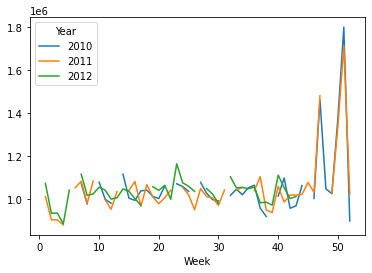

In [21]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Week")
weekly_sales.plot()

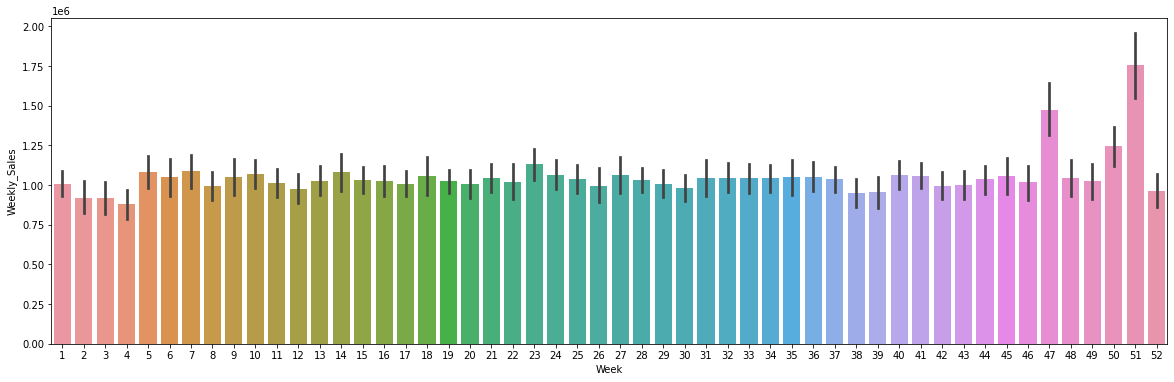

In [22]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Week', y='Weekly_Sales', data=df)

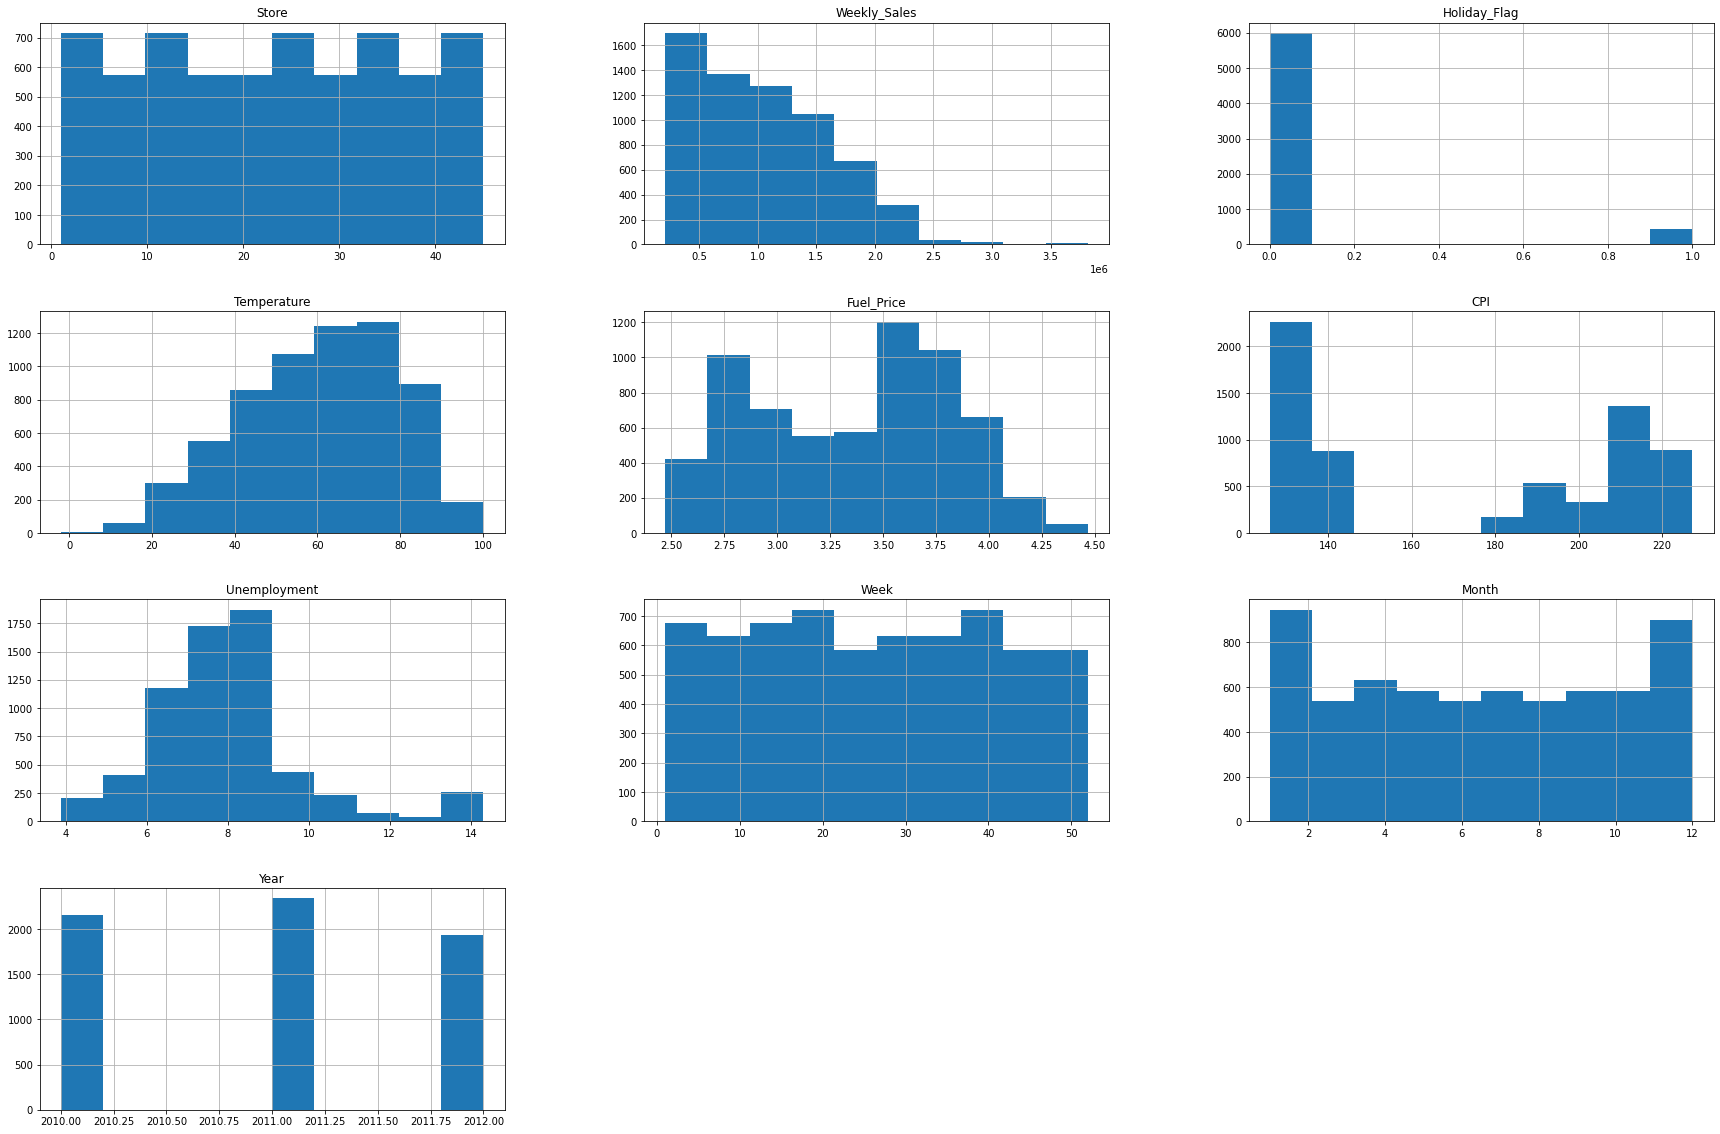

In [23]:
df.hist(figsize=(30,20));

### Weekly Sales By Store

Text(0.5, 0, 'Store')

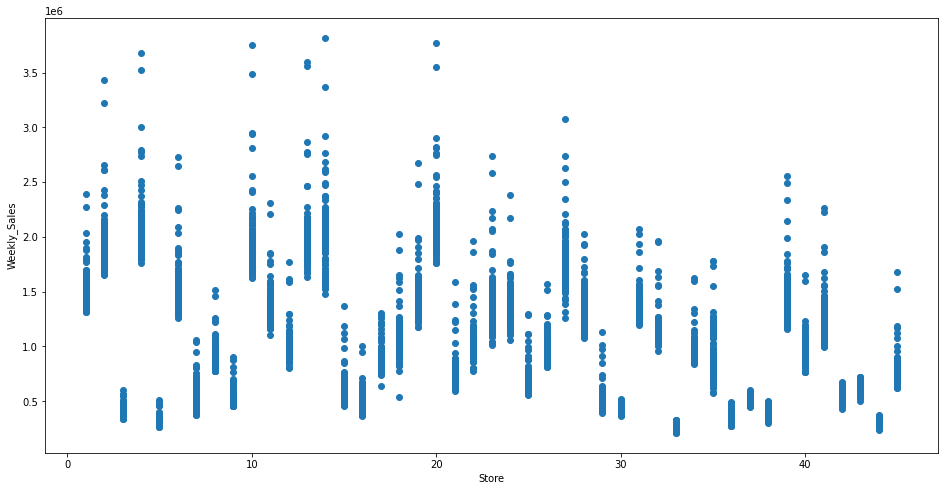

In [24]:
plt.figure(figsize=(16,8));
plt.scatter(df['Store'],df['Weekly_Sales'])
plt.ylabel('Weekly_Sales')
plt.xlabel('Store')

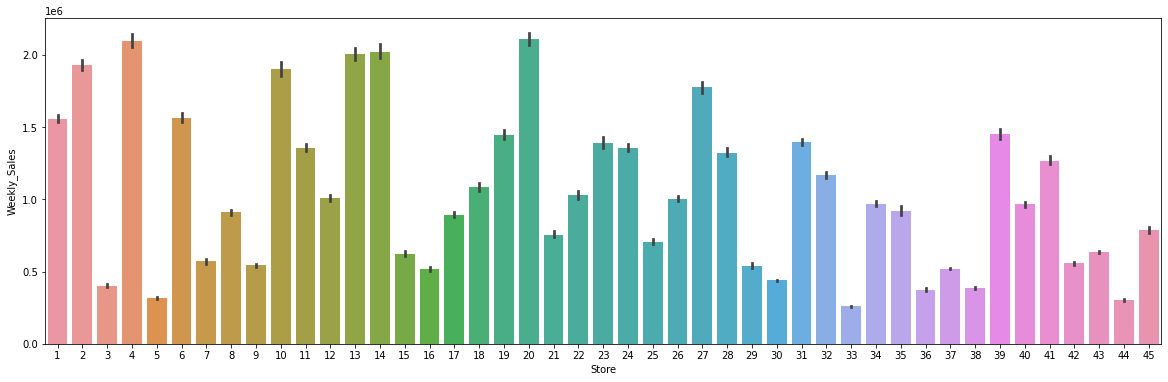

In [25]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)

In [26]:
df.groupby('Store').mean().sort_values(by='Weekly_Sales', ascending=False).head(5) #weekly sales of top 5 store

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year
Store,,,,,,,,,
20,2.107677e+06,0.06993,55.451399,3.417608,209.038131,7.371413,26.0,6.475524,2010.965035
4,2.094713e+06,0.06993,62.253357,3.216972,128.679669,5.964692,26.0,6.475524,2010.965035
14,2.020978e+06,0.06993,57.790979,3.417608,186.285678,8.648748,26.0,6.475524,2010.965035
13,2.003620e+06,0.06993,53.697133,3.286147,128.679669,7.001825,26.0,6.475524,2010.965035
2,1.925751e+06,0.06993,68.216364,3.219699,215.646311,7.623846,26.0,6.475524,2010.965035


### Weekly Sales by Fuel Price

Text(0.5, 0, 'Fuel_Price')

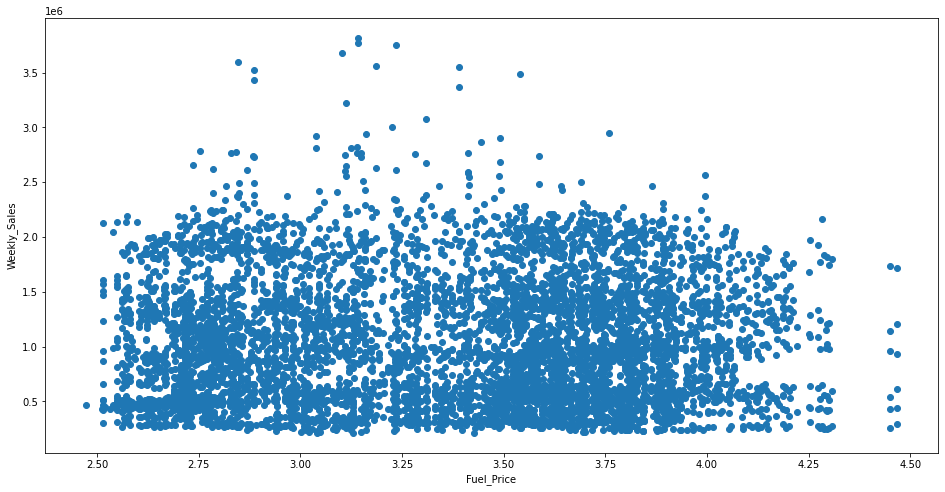

In [27]:
plt.figure(figsize=(16,8));
plt.scatter(df['Fuel_Price'],df['Weekly_Sales'])
plt.ylabel('Weekly_Sales')
plt.xlabel('Fuel_Price')

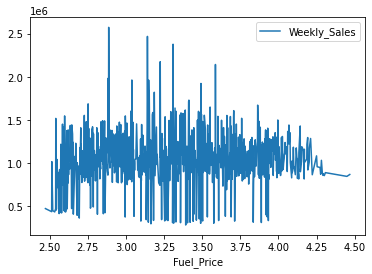

In [28]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

### Weekly sales by CPI

Text(0.5, 0, 'CPI')

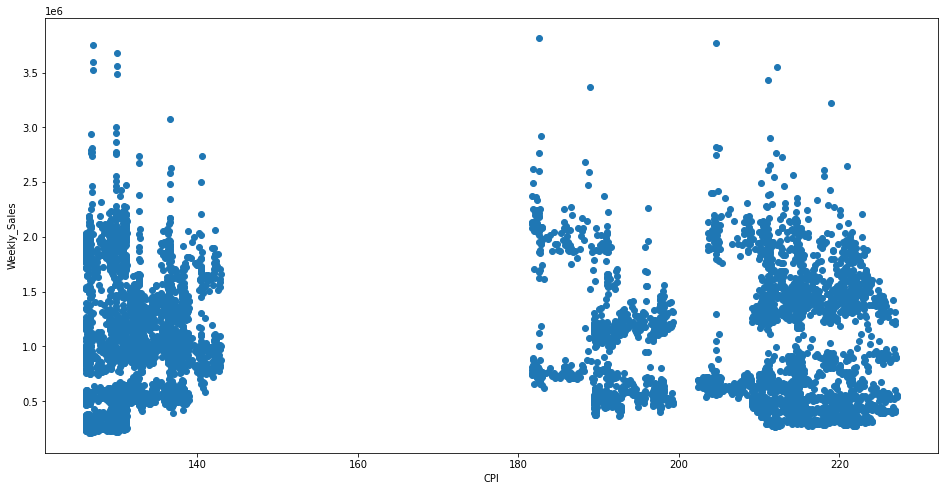

In [29]:
plt.figure(figsize=(16,8));
plt.scatter(df['CPI'],df['Weekly_Sales'])
plt.ylabel('Weekly_Sales')
plt.xlabel('CPI')

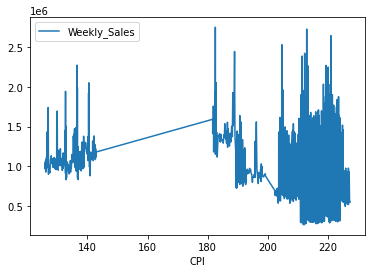

In [30]:
CPI = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
CPI.plot()

### Weekly sales by Unemployment

Text(0.5, 0, 'Unemployment')

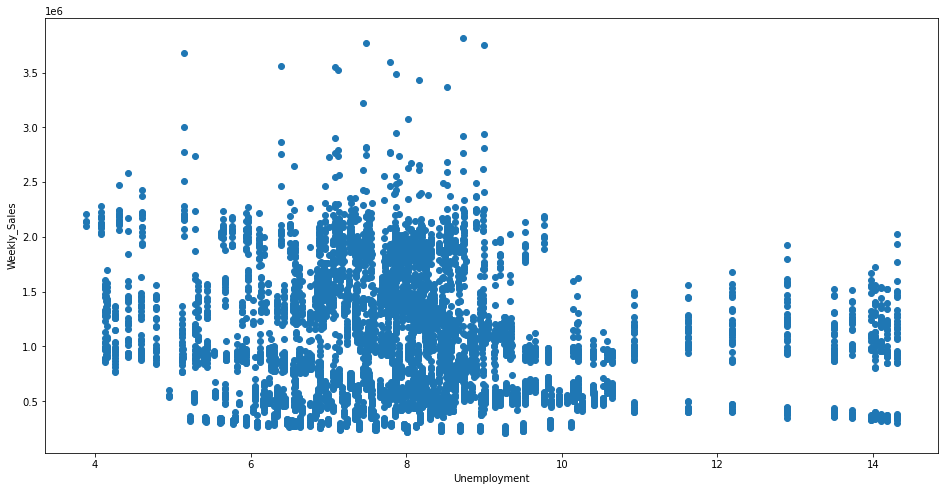

In [31]:
plt.figure(figsize=(16,8));
plt.scatter(df['Unemployment'],df['Weekly_Sales'])
plt.ylabel('Weekly_Sales')
plt.xlabel('Unemployment')

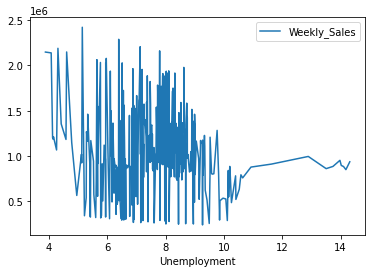

In [32]:
unemployment = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

### Weekly Sales by Temperature

Text(0.5, 0, 'Temperature')

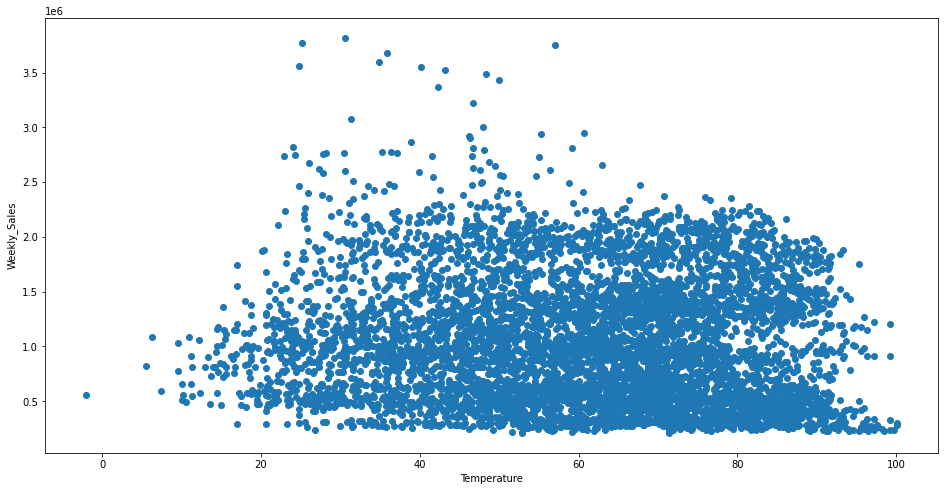

In [33]:
plt.figure(figsize=(16,8));
plt.scatter(df['Temperature'],df['Weekly_Sales'])
plt.ylabel('Weekly_Sales')
plt.xlabel('Temperature')

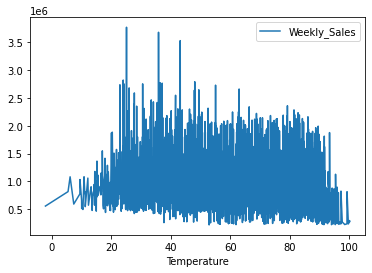

In [34]:
temperature = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
temperature.plot()

In [35]:
#CPI, Temperature, Unemployment and Fuel_Price have no pattern on weekly sales.

In [36]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Week', 'Month', 'Year'],
      dtype='object')

In [37]:
# Dropping down the variables that have weak correlation
df = df.drop(columns=['CPI', 'Unemployment','Temperature'])

In [38]:
x = df.drop('Weekly_Sales', axis=1)
y = df['Weekly_Sales']

In [39]:
def algo_test(x,y):
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [40]:
algo_test(x,y)

[00:21:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,R_Squared,RMSE,MAE
Decision Tree,0.924717,155732.942946,91316.869095
XGBRegressor,0.890120,188144.050338,141571.194814
Gradient Boosting,0.888706,189351.449965,141595.876728
Extra Tree,0.876998,199062.239324,104117.626399
KNeighborsRegressor,0.468299,413871.792702,310110.101214
Lasso,0.129199,529653.106405,438898.077480
Linear,0.129199,529653.186320,438898.072531
Ridge,0.129181,529658.702311,438904.049649
ElasticNet,0.121236,532069.261628,440960.862208
